In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scikitplot as skplt 
import matplotlib.pyplot as plt  
from sklearn.metrics import precision_score , recall_score,f1_score,accuracy_score

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
data = pd.read_csv('pre_advertisment(after2).csv')
data

,Unnamed: 0.1,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Internet usage bucket
0,0,0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0,1
1,1,1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0,0
2,2,2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0,1
3,3,3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0,1
4,4,4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1,0
996,996,996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1,-1
997,997,997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1,-1
998,998,998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0,0


In [ ]:
# replacing values 
data['Internet usage bucket'].replace(['Below average', 'Average', 'Above average'],[-1, 0, 1], inplace=True)
data.drop(['Unnamed: 0'], axis=1)

,Unnamed: 0.1,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Internet usage bucket
0,0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0,1
1,1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0,0
2,2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0,1
3,3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0,1
4,4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1,0
996,996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1,-1
997,997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1,-1
998,998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0,0


In [ ]:
data.to_csv(r'C:\SW485-Advertisement-Click-on-Ad-Group6\Phase2\pre_advertisment(after2).csv')

In [ ]:
data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [ ]:
feature_cols =['Daily Time Spent on Site','Age','Area Income','Internet usage bucket']
x=data[feature_cols]
y=data['Clicked on Ad']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
clf = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)*100
recall = recall_score(y_test,y_pred)*100
precision = precision_score(y_test,y_pred)*100
f1 = metrics.f1_score(y_test,y_pred,average='binary')*100

print('Accuracy: %.2f'% accuracy,'%')
print('Recall: %.2f'% recall,'%')
print('Precision: %.2f'% precision,'%')
print('F1 score: %.2f'% f1,'%') 

Accuracy: 93.67 %
Recall: 88.96 %
Precision: 98.56 %
F1 score: 93.52 %


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf,x,y,cv=5)
print ('cross validation score: ', score)

cross validation score:  [0.97  0.945 0.975 0.935 0.95 ]


In [ ]:
trainAcc = clf.score(x_train,y_train)*100
testAcc = clf.score(x_test,y_test)*100
print('Training Accuracy: %.2f'% trainAcc, '%')
print('Testing Accuracy: %.2f'% testAcc, '%')

Training Accuracy: 98.43 %
Testing Accuracy: 93.67 %


In [20]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize =True ,title='Confusion Matrix')

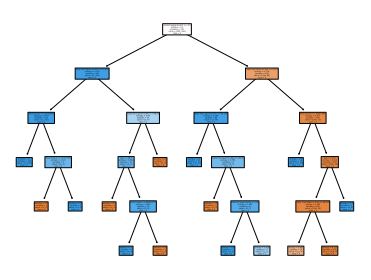

In [21]:
from sklearn import tree
%config InlineBackend.figure_format = 'svg'
plot = tree.plot_tree(clf, feature_names = feature_cols , class_names = '01', filled = True)

Classifier 3: SVM

In [23]:
from sklearn import svm

# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train,y_train)
# classifier_svm = svm.SVC(kernel='rbf',  probability=True, random_state=0).fit(x_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(x_test, y_test))

print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(x_test)
ConfusionMatrix = metrics.confusion_matrix(y_test,predicted_svm)
print(ConfusionMatrix)

print("\nClassification_report of SVM classifier:")
print(metrics.classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")

from sklearn import metrics, svm


## Calculate Sensitivity(Recall) 
# (True Positive recognition rate) TP/(TP+FN)
Senstivity = ConfusionMatrix[1,1] / ( ConfusionMatrix[1,0] + ConfusionMatrix[1,1] )
print('Senstivity(or Recall):%.2f'%Senstivity,'%')

## Calculate Specificity 
## (True Nregative recognition rate) TN/(TN+FP)
Specificity = ConfusionMatrix[0,0] / ( ConfusionMatrix[0,0] + ConfusionMatrix[0,1] )
print('Specificity:%.2f'% Specificity,'%')

## Calculate Precision 
Precision = metrics.precision_score(y_test,predicted_svm, average="micro")
print('Precision:%.2f'%Precision,'%')


SVM accuracy: 0.90

Confusion matrix of the SVM classifier:
[[143   3]
 [ 28 126]]

Classification_report of SVM classifier:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       146
           1       0.98      0.82      0.89       154

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300

----------------------------------------------------------------------------
Senstivity(or Recall):0.82 %
Specificity:0.98 %
Precision:0.90 %


- Accuracy is the percentage of test dataset that are CORRECTLY classified

Confusion Matrix : 

TN (143 classified as NOT clicked correctly) 

FP (only 3 classified wrongly as clicked when it is not) 

FN (only 28 classified wrongly as Not clicked when it Clicked) 

TP (126 classified as Clicked correctly) 

_______________________________________________________________________________

Classification report provides comperhensive summary of Precision, Recall, f1 score for each class

The support column provides number of samples of each class, for the class label 1(Clicked) is 154 and for the class label 0 is 146

- the pricision of class label 1 is near from 1 and that indicates the very LOW FalsePositive rate (only 3 classified as clicked when it is not) 




Macro Avg ( Note* Doean't take class imbalance into account) is the average Precision, recall, f1-score between calsses

meanwhile, in weighted average ; each metric is calculated With respect to how many samples there are in each class.

* This metric will favour the majority class (give a high value when one class out performs another due to having more samples)

In [24]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_svm.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds) 
roc_auc = metrics.auc(fpr, tpr)

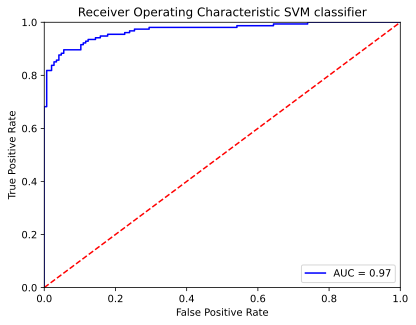

In [25]:
import matplotlib.pyplot as plt  

# polt the AUC
plt.title('Receiver Operating Characteristic SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()